<a href="https://colab.research.google.com/github/sorentys/MachineLearning/blob/main/knn_decision_tree_and_logistic_regression_model_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 11

In [ ]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

## Introduction:
You will use the `sklearn` API to train various classifiers. Feel free to use any `sklearn`, `numpy`, or `pandas` function to help you with the lab.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. The 20 categories are:
```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```
The posts are raw text. For example:

**Post:**
```
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
```

**Target:**
```
'rec.autos'
```

Your task will be to build a classifier to predict the category of posts. You will do the following in this notebook:

## Exercise 1: Retrieve the Data
Download `fetch_20newsgroups` dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
docs = data['data']
targets = data["target"]
names = data.target_names

Print off the first document and its target classification to make sure its been downloaded correctly 

In [ ]:
#Enter code here.
print(docs[0])
print(names[targets[0]])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





rec.autos


## Exercise 2: Understand the Data

Perform some exploratory analysis on your data. Specifically, plot a bar chart showing distribution of the categories (classes)

Text(0.5, 0, 'Targets')

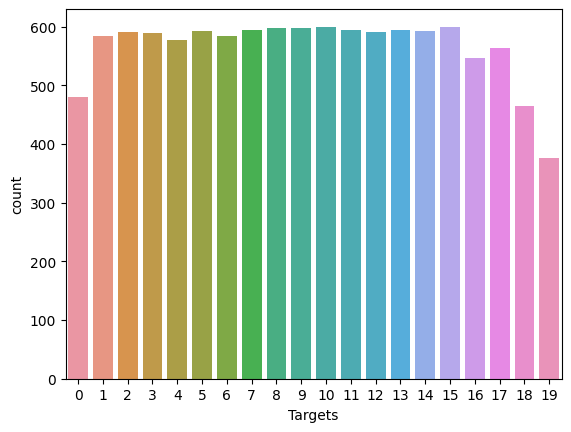

In [ ]:
#Enter code here
plot = sns.countplot(x=targets)
plot.set_xlabel('Targets')


## Exercise 3: Engineer the Data
Extract features from raw text. You are free to be creative here. There is no correct answer. Try and think of the features (input) that are most predictive of the category. Some helpful sklearn feature engineering code can be found here (I'd recommend reading through the documentation before diving in and trying to get these tools to work):

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
* [TFIDF Text Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [ ]:
#Enter code here to engineer the data
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=50000)
fit_data = count_vector.fit_transform(docs)

## Exercise 4: Split the Data

Split your data into train and test splits. Use an 80%/20% split rule for train and test respectively. I'd recommend using the function from the last lab

In [ ]:
#Enter code here to split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fit_data, targets, test_size=.2)
print(x_test.shape)

(2263, 50000)


## Exercise 5: Train the Model

Using sklearn, train the following three classifiers using the training set:
* KNN
* Decision Tree
* Logistic Regression

In [ ]:
# Train the model using the KNN Cluster Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(x_train, y_train)

In [ ]:
# Train the model using the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)


In [ ]:
# Train the model using the Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Exercise 6: Evaluate the Model
Compare the performance of your classifiers on the test set. Discuss which one performs the best.

In [ ]:
# Evaluate the KNN Cluster model
from sklearn.metrics import accuracy_score
knn_predict = knn.predict(x_test)
knn_test_accuracy = accuracy_score(y_test, knn_predict)
print(knn_test_accuracy)

0.48033583738400354


In [ ]:
# Evaluate the Decision Tree model
decision_predict = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, decision_predict)
print(decision_tree_accuracy)

0.6403004860804242


In [ ]:
# Evaluate the Logistic Regression model
log_predict = log_reg.predict(x_test)
log_reg_accuracy = accuracy_score(y_test, log_predict)
print(log_reg_accuracy)

0.8846663720724701


Discuss which one performs the best:

The logistic regression had the best accuracy score.